# Importing Libraraies


In [1]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

# Data Augmentation

In [2]:
datagen = ImageDataGenerator(
    rescale = 1./127,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# OneHot Encoding

In [3]:
encoder = OneHotEncoder()
encoder.fit([[00], [1],[10],[11]]) 

# 00 - No tumor
# 01 - pituitary_tumor
# 10 - meningioma_tumor
# 11 - glioma_tumor

OneHotEncoder()

# Extracting data , path and result from the dataset

In [4]:
# extracting data , path and result For NO TUMOR data...

data = []
paths = []
result = []

for r, d, f in os.walk(r'../Dataset/BrainTumor/Training/no_tumor'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    # img = Image.fromarray(img , 'RGB')
    print(img)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x350 at 0x1E38957B760>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x350 at 0x1E39584E8C0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=605x613 at 0x1E39584E8F0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=562x592 at 0x1E39584E890>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=442x442 at 0x1E39584E830>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=630x630 at 0x1E39584E860>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x442 at 0x1E39584E7D0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=220x212 at 0x1E39584E8C0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=225x225 at 0x1E39584E8F0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=254x198 at 0x1E39584E890>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=225x225 at 0x1E39584E830>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=630x630 at 0x1E39584E860>
<PIL.JpegImagePlugin.JpegIma

In [5]:
# extracting data , path and result For PITUITARY_TUMOR data...

paths = []
for r, d, f in os.walk(r"C:/Users/pagha/Downloads/BrainTumor/Training/pituitary_tumor"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [6]:
# extracting data , path and result For MENINGIOMA_TUMOR data...

paths = []
for r, d, f in os.walk(r"C:/Users/pagha/Downloads/BrainTumor/Training/meningioma_tumor"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[10]]).toarray())

In [7]:
# extracting data , path and result For GLIOMA_TUMOR data...

paths = []
for r, d, f in os.walk(r"C:/Users/pagha/Downloads/BrainTumor/Training/glioma_tumor"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[11]]).toarray())

In [8]:
data = np.array(data)
data.shape

(2870, 128, 128, 3)

In [9]:
result = np.array(result)
result = result.reshape(2870,4)

# Extracting data for Testing

In [10]:
# extracting data , path and result For NO TUMOR data...

data_test = []
paths_test = []
result_test = []

for r, d, f in os.walk(r'C:/Users/pagha/Downloads/BrainTumor/Testing/no_tumor'):
    for file in f:
        if '.jpg' in file:
            paths_test.append(os.path.join(r, file))

for path in paths_test:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data_test.append(np.array(img))
        result_test.append(encoder.transform([[0]]).toarray())

In [11]:
# extracting data , path and result For pituitary_tumor data...

data_test = []
paths_test = []
result_test = []

for r, d, f in os.walk(r'C:/Users/pagha/Downloads/BrainTumor/Testing/pituitary_tumor'):
    for file in f:
        if '.jpg' in file:
            paths_test.append(os.path.join(r, file))

for path in paths_test:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data_test.append(np.array(img))
        result_test.append(encoder.transform([[1]]).toarray())

In [12]:
# extracting data , path and result For meningioma_tumor data...

data_test = []
paths_test = []
result_test = []

for r, d, f in os.walk(r'C:/Users/pagha/Downloads/BrainTumor/Testing/meningioma_tumor'):
    for file in f:
        if '.jpg' in file:
            paths_test.append(os.path.join(r, file))

for path in paths_test:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data_test.append(np.array(img))
        result_test.append(encoder.transform([[10]]).toarray())

In [13]:
# extracting data , path and result For glioma_tumor data...

data_test = []
paths_test = []
result_test = []

for r, d, f in os.walk(r'C:/Users/pagha/Downloads/BrainTumor/Testing/glioma_tumor'):
    for file in f:
        if '.jpg' in file:
            paths_test.append(os.path.join(r, file))

for path in paths_test:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data_test.append(np.array(img))
        result_test.append(encoder.transform([[11]]).toarray())

In [14]:
data_test = np.array(data_test)
data_test.shape

(100, 128, 128, 3)

In [15]:
result_test = np.array(result_test)
result_test = result_test.reshape(100,4)

In [42]:
# x_train,x_test,y_train,y_test = train_test_split(data, result, train_size=1.0, shuffle=True, random_state=0)
# x_temp,x_test,y_temp,y_test = train_test_split(data_test, result_test, test_size=1.0, shuffle=True, random_state=0)

# Buiding Model 

In [25]:
model = Sequential()

# Layer 1
#32 filter
model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
# 32 filters with ReLU activation
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# layer 2 with 64 filters
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

# Output Layer for 4 classes with softmax activation
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['accuracy'])
print(model.summary())


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 128, 128, 32)      416       
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization_4 (Bat  (None, 128, 128, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 64, 64, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 64, 64)       

In [17]:
data.shape
data_test.shape

(100, 128, 128, 3)

In [32]:
# early_stopping = EarlyStopping(monitor='val_loss',patience = 5 , restore_best_weights = True)
# history = model.fit(datagen.flow(data, result, batch_size=40),epochs=40, verbose = 1,validation_data = (data_test, result_test))
history = model.fit(data, result,epochs=6, verbose = 1,validation_data = (data_test, result_test))


Epoch 1/6
90/90 [==============================] - 61s 680ms/step - loss: 0.1628 - accuracy: 0.9394 - val_loss: 13.5989 - val_accuracy: 0.1900
Epoch 2/6
90/90 [==============================] - 62s 691ms/step - loss: 0.1412 - accuracy: 0.9463 - val_loss: 16.1239 - val_accuracy: 0.1900
Epoch 3/6
90/90 [==============================] - 63s 698ms/step - loss: 0.1315 - accuracy: 0.9537 - val_loss: 13.6288 - val_accuracy: 0.2000
Epoch 4/6
90/90 [==============================] - 63s 701ms/step - loss: 0.1038 - accuracy: 0.9575 - val_loss: 12.7136 - val_accuracy: 0.1900
Epoch 5/6
90/90 [==============================] - 60s 670ms/step - loss: 0.1078 - accuracy: 0.9596 - val_loss: 14.7658 - val_accuracy: 0.1900
Epoch 6/6
90/90 [==============================] - 61s 672ms/step - loss: 0.0911 - accuracy: 0.9627 - val_loss: 13.1925 - val_accuracy: 0.1900


# Plotting Losses

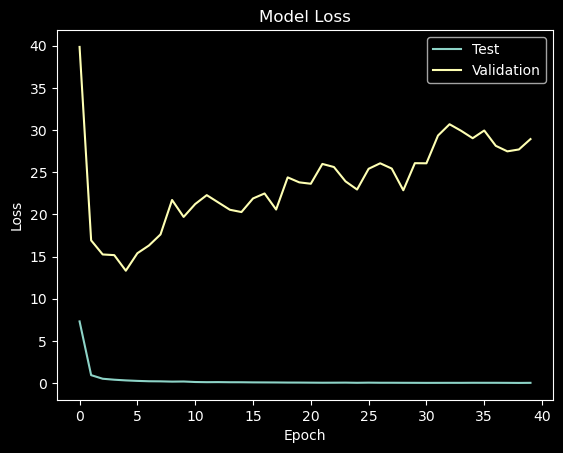

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()